In [4]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')


In [5]:

import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')

# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary statistics:\n", df.describe())


Shape of the dataset: (200, 5)

Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Number of duplicate rows: 0

Data types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [7]:
# DATA PREPROCESSING

from sklearn.preprocessing import StandardScaler
numerical_features = ['CustomerID','Age','Annual_Income_(k$)','Spending_Score']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())


   CustomerID   Genre       Age  Annual_Income_(k$)  Spending_Score
0   -1.723412    Male -1.424569           -1.738999       -0.434801
1   -1.706091    Male -1.281035           -1.738999        1.195704
2   -1.688771  Female -1.352802           -1.700830       -1.715913
3   -1.671450  Female -1.137502           -1.700830        1.040418
4   -1.654129  Female -0.563369           -1.662660       -0.395980


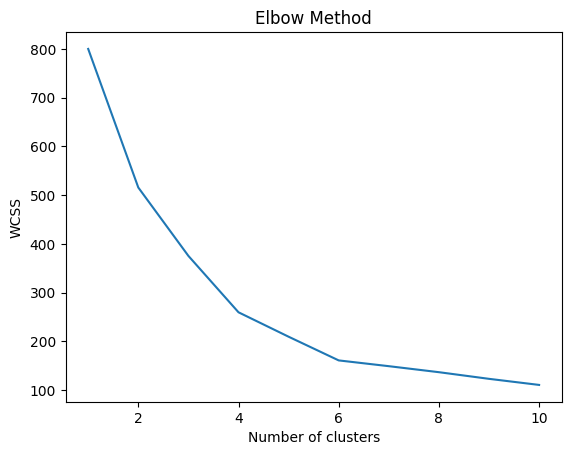

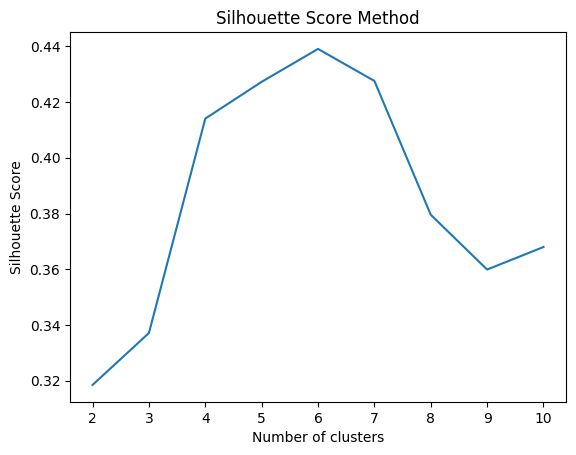

In [8]:
#CLUSTERING
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[numerical_features])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine optimal number of clusters using Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[numerical_features])
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df[numerical_features], labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(df[numerical_features])
# Assign cluster labels to each customer
df['Cluster'] = kmeans.labels_
print(df.head())

   CustomerID   Genre       Age  Annual_Income_(k$)  Spending_Score  Cluster
0   -1.723412    Male -1.424569           -1.738999       -0.434801        2
1   -1.706091    Male -1.281035           -1.738999        1.195704        2
2   -1.688771  Female -1.352802           -1.700830       -1.715913        4
3   -1.671450  Female -1.137502           -1.700830        1.040418        2
4   -1.654129  Female -0.563369           -1.662660       -0.395980        4


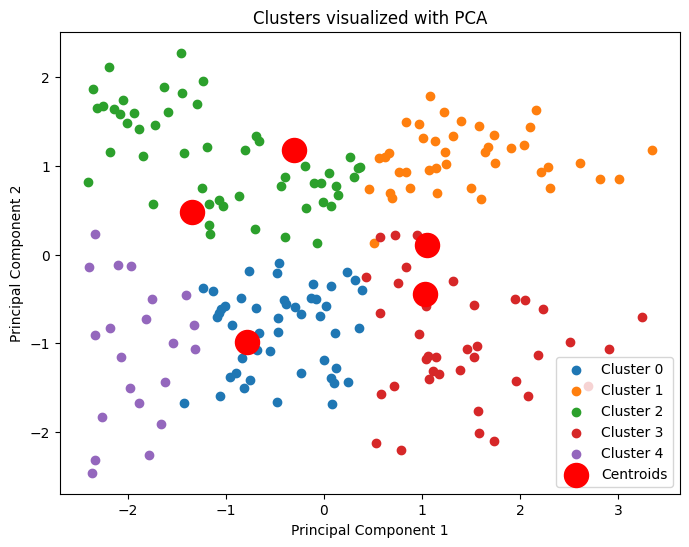

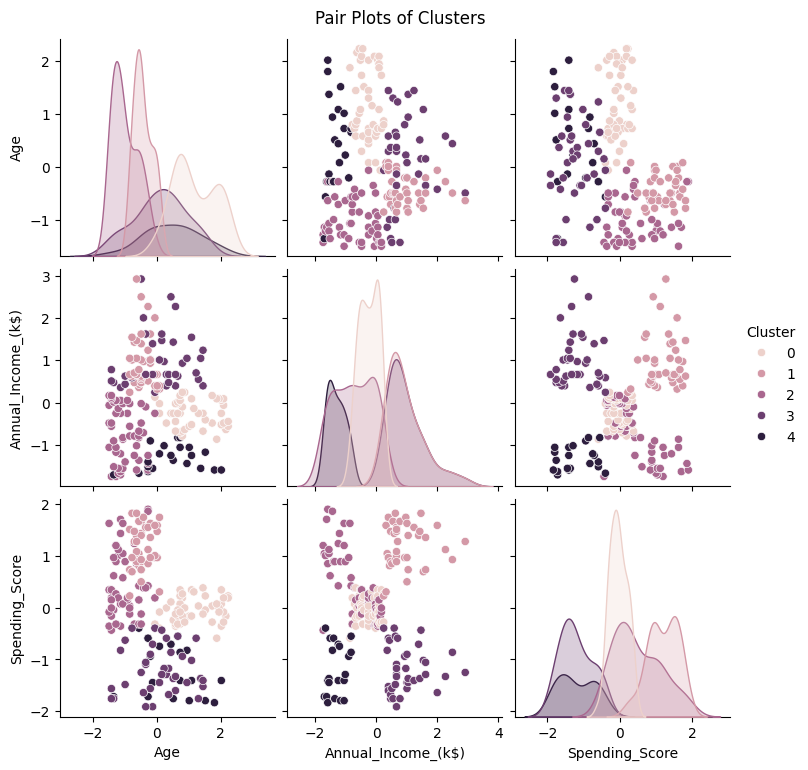

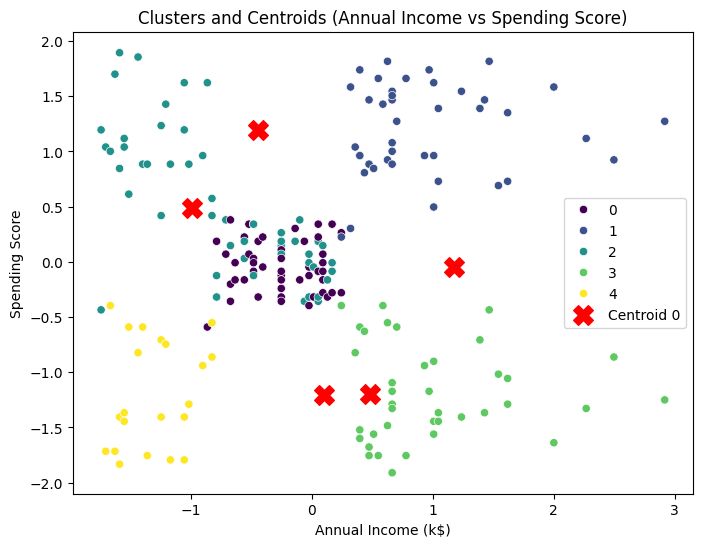

In [10]:
#Visualization
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# 2D Scatter Plot with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_features])
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(df[df['Cluster'] == cluster]['PC1'], df[df['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Pair Plots
sns.pairplot(df, hue='Cluster', vars=numerical_features[1:])
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=df, palette='viridis')

for i in range(optimal_k):
  plt.scatter(kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 3], marker='X', s=200, c='red', label=f'Centroid {i}' if i == 0 else '')

plt.title('Clusters and Centroids (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [ ]:
# The column has already been added in the previous code.
# This line is redundant and can be removed.
# df['Cluster'] = kmeans.labels_
